<h1 style='color:purple' align='center'> Online Retail project </h1>

<h1 style='color:blue'>Importing libs</h1>

In [75]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

import plotly.express as px

<h1 style='color:blue'> Step1: Load  Online Retail Dataset into a dataframe</h1>

In [76]:
df = pd.read_csv('Online Retail.csv')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08


In [77]:
df.shape

(28492, 9)

In [78]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [79]:
df['Country'].value_counts()

United Kingdom     27119
Germany              309
France               287
EIRE                 228
Norway               147
Portugal              94
Japan                 65
Spain                 65
Lithuania             35
Iceland               31
Italy                 25
Australia             22
Denmark               20
Channel Islands       17
Belgium               12
Poland                 8
Switzerland            6
Netherlands            2
Name: Country, dtype: int64

<h1 style='color:blue'>Step1:Data Cleaning and Preprocessing</h1>

<h3 style='color:black'>Check our data if there are any duplicate  values & Handling duplicate values</h3>

In [80]:
data_cleaned= df.copy()

In [81]:
data_cleaned.duplicated().sum()

412

In [82]:
data_cleaned.drop_duplicates(inplace=True)
data_cleaned.duplicated().sum()

0

<h3 style='color:black'>Check our data if there are any missing  values & Handling missing values</h3>

In [83]:
# Checking for missing values before cleaning
data_cleaned.isnull().sum()


InvoiceNo          0
StockCode          0
Description      113
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     10002
Country            0
TotalPrice         0
dtype: int64

In [84]:
# Handling missing values
# For 'Description', we replace missing values with a placeholder such as 'No Description'
data_cleaned['Description'].fillna('No Description', inplace=True)

In [85]:
# Handling missing values
# For 'CustomerID', we  remove rows with missing customer IDs
data_cleaned.dropna(subset=['CustomerID'], inplace=True)

In [86]:
# Checking for missing value after  cleaning
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

##### Comments

The primary goal was to maintain the dataset's integrity and reliability for further analysis.
The methods chosen aim to balance between retaining as much data as possible and ensuring the accuracy and completeness of the dataset for meaningful insights

##### 1. Handling Missing Description Values

##### 1. Handling Missing Description Values
Method: Missing values in the Description column were replaced with 'No Description'. Justification: The Description field is likely important for item identification but not critical for quantitative analysis. Replacing missing descriptions with a placeholder like 'No Description' allows us to retain these rows for quantitative analysis without introducing bias. This approach is preferable to removing these rows, as it preserves the integrity of other columns, particularly those relevant for sales and customer analysis

##### 2. Handling Missing CustomerID Values


Method: Rows with missing CustomerID values were removed.
Justification:
The decision to remove rows based on missing CustomerID values, while potentially reducing the dataset size, was necessary to maintain data quality, especially for customer-centric analyses

<h3 style='color:black'>Check our data if there are outlier  & Removing outlier</h3>

##### Comments

We'll f removing outliers in the Quantity, UnitPrice, and TotalPrice columns using the Interquartile Range (IQR) method. This means identifying and removing rows where the values in these columns fall outside 1.5 times the IQR from the 25th and 75th percentiles.

After removing the outliers, We'll create comparative box plots to show the difference between the original data and the data with outliers removed

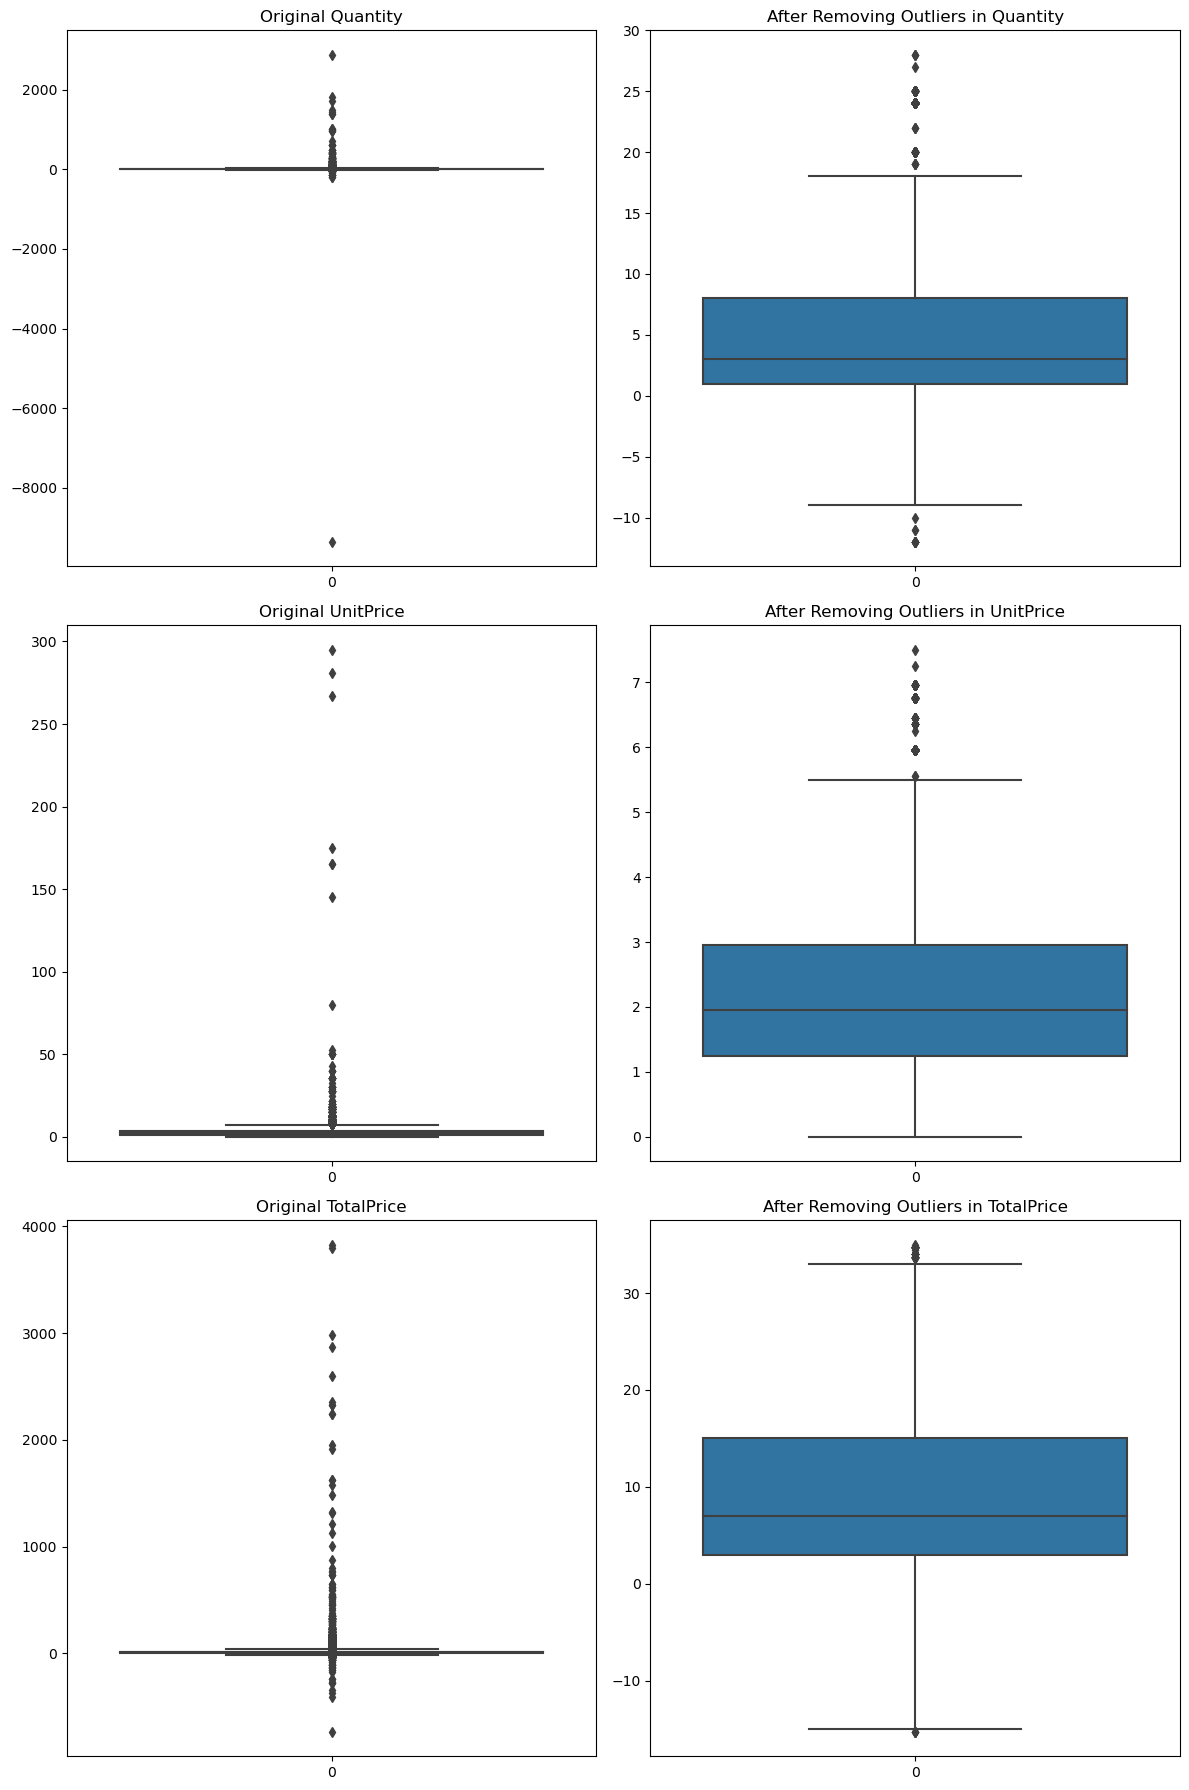

In [87]:
# Removing outliers based on IQR method again

def remove_outliers_iqr(data_cleaned, column):
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]


data_no_outliers_iqr = remove_outliers_iqr(data_cleaned, 'Quantity')
data_no_outliers_iqr = remove_outliers_iqr(data_no_outliers_iqr, 'UnitPrice')
data_no_outliers_iqr = remove_outliers_iqr(data_no_outliers_iqr, 'TotalPrice')




# Correcting the comparative box plot function

def comparative_boxplot_before_after(original_data, cleaned_data, column, axs, row):
    sns.boxplot(data=original_data[column], ax=axs[row, 0])
    axs[row, 0].set_title(f'Original {column}')

    sns.boxplot(data=cleaned_data[column], ax=axs[row, 1])
    axs[row, 1].set_title(f'After Removing Outliers in {column}')

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# Box plots for Quantity
comparative_boxplot_before_after(data_cleaned, data_no_outliers_iqr, 'Quantity', axs, 0)

# Box plots for UnitPrice
comparative_boxplot_before_after(data_cleaned, data_no_outliers_iqr, 'UnitPrice', axs, 1)

# Box plots for TotalPrice
comparative_boxplot_before_after(data_cleaned, data_no_outliers_iqr, 'TotalPrice', axs, 2)

plt.tight_layout()
plt.show()








<h1 style='color:blue'>Step2: Exploratory Data Analysis (EDA)</h1>

<h3 style='color:black'>  Descriptive statistics</h3>

In [88]:
Desc_stat =data_cleaned.copy()

In [89]:
# Descriptive statistics for numerical columns
Desc_stat[['Quantity', 'UnitPrice', 'TotalPrice']].describe()


,Quantity,UnitPrice,TotalPrice
count,18078.000000,18078.000000,18078.000000
mean,9.990541,3.140889,20.292922
std,83.611388,5.380144,85.013097
min,-9360.000000,0.000000,-734.400000
25%,1.000000,1.250000,3.750000
50%,4.000000,2.100000,10.000000
75%,12.000000,3.750000,17.700000
max,2880.000000,295.000000,3828.000000


In [90]:
Desc_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18078 entries, 0 to 28491
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    18078 non-null  object 
 1   StockCode    18078 non-null  object 
 2   Description  18078 non-null  object 
 3   Quantity     18078 non-null  int64  
 4   InvoiceDate  18078 non-null  object 
 5   UnitPrice    18078 non-null  float64
 6   CustomerID   18078 non-null  float64
 7   Country      18078 non-null  object 
 8   TotalPrice   18078 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.9+ MB


In [91]:
Desc_stat.shape

(18078, 9)

In [92]:
Desc_stat.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,18078.000000,18078.000000,18078.000000,18078.000000
mean,9.990541,3.140889,15582.045027,20.292922
std,83.611388,5.380144,1750.536527,85.013097
min,-9360.000000,0.000000,12347.000000,-734.400000
25%,1.000000,1.250000,14213.000000,3.750000
50%,4.000000,2.100000,15601.000000,10.000000
75%,12.000000,3.750000,17218.000000,17.700000
max,2880.000000,295.000000,18269.000000,3828.000000


<h3 style='color:black'>  Distribution Analysis</h3>

In [93]:
Dist_Analy =  Desc_stat.copy()

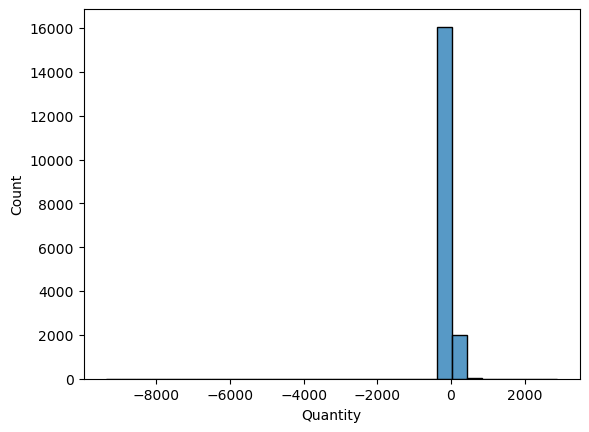

In [94]:

# Distribution of 'Quantity'
sns.histplot(Dist_Analy['Quantity'], bins=30)
plt.show()

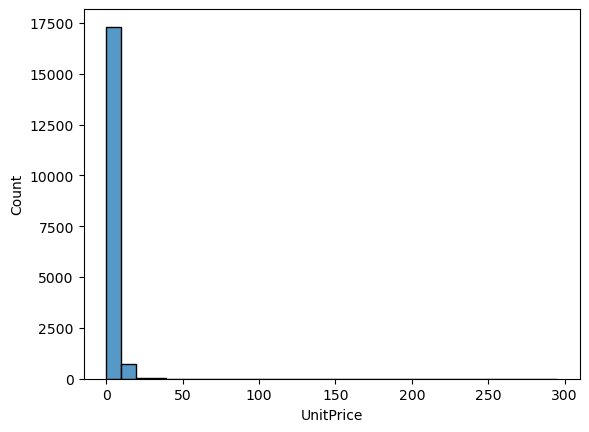

In [95]:
# Distribution of 'UnitPrice'
sns.histplot(Dist_Analy['UnitPrice'], bins=30)
plt.show()

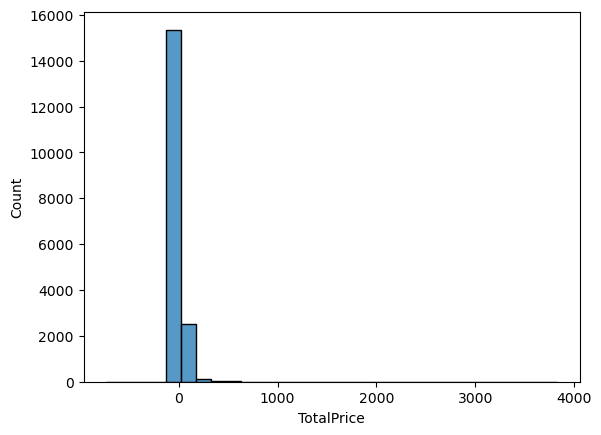

In [96]:
# Distribution of 'TotalPrice'
sns.histplot(Dist_Analy['TotalPrice'], bins=30)
plt.show()

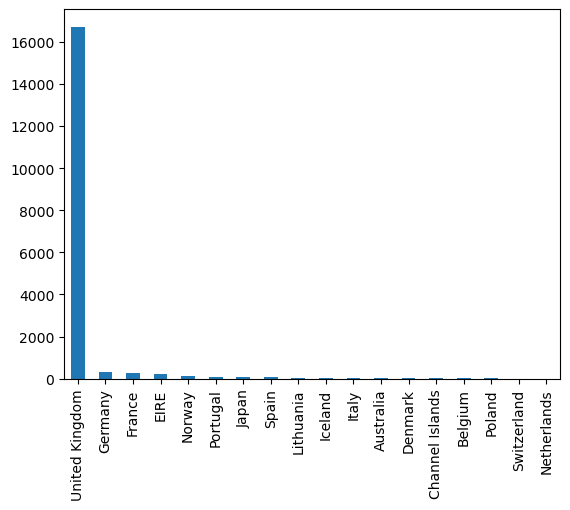

In [97]:
# Bar chart for 'Country'
Dist_Analy['Country'].value_counts().plot(kind='bar')
plt.show()

<h3 style='color:black'>  Unique values of categorical variables</h3>

In [98]:
Unique_Values =data_cleaned.copy()



In [99]:
# Select only categorical columns
categorical_columns = Unique_Values.select_dtypes(include='object').columns

# Investigate unique values for each categorical variable
for column in categorical_columns:
    unique_values = Unique_Values[column].unique()
    num_unique_values = len(unique_values)

    print(f"Unique values for '{column}': {unique_values}")
    print(f"Number of unique values: {num_unique_values}")
    print()

Unique values for 'InvoiceNo': ['536365' '536366' '536367' ... '538636' '538637' '538638']
Number of unique values: 1071

Unique values for 'StockCode': ['85123A' '71053' '84406B' ... '90014B' '90147' '90032']
Number of unique values: 2151

Unique values for 'Description': ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'GOLD M PEARL  ORBIT NECKLACE'
 'CHUNKY SILVER NECKLACE PASTEL FLOWE' 'IVORY SHELL HEART NECKLACE']
Number of unique values: 2156

Unique values for 'InvoiceDate': ['12/1/10 8:26' '12/1/10 8:28' '12/1/10 8:34' '12/1/10 8:35'
 '12/1/10 8:45' '12/1/10 9:00' '12/1/10 9:01' '12/1/10 9:02'
 '12/1/10 9:09' '12/1/10 9:32' '12/1/10 9:34' '12/1/10 9:37'
 '12/1/10 9:41' '12/1/10 9:45' '12/1/10 9:49' '12/1/10 9:53'
 '12/1/10 9:56' '12/1/10 9:57' '12/1/10 9:58' '12/1/10 9:59'
 '12/1/10 10:03' '12/1/10 10:19' '12/1/10 10:24' '12/1/10 10:29'
 '12/1/10 10:37' '12/1/10 10:39' '12/1/10 10:47' '12/1/10 10:51'
 '12/1/10 10:52' '12/1/10 10:

#### comments 

the code provides a good starting point for exploring and understanding the categorical variables in the dataset.
The insights gained from unique values and their counts can inform subsequent steps in data preprocessing,
visualization, or analysis.

##### comments  and justifications

The chosen EDA methods provide a comprehensive view of the dataset, crucial for making informed decisions in a retail environment

They balance between giving a broad overview (like with descriptive statistics) and drilling down into specific aspects (like with distribution)

These methods were chosen to maximize insights from the data, which is particularly important in retail where understanding customer behavior, sales trends, and product performance is key to business success

<h2 style='color:black'>Sales Trends Analysis </h2>

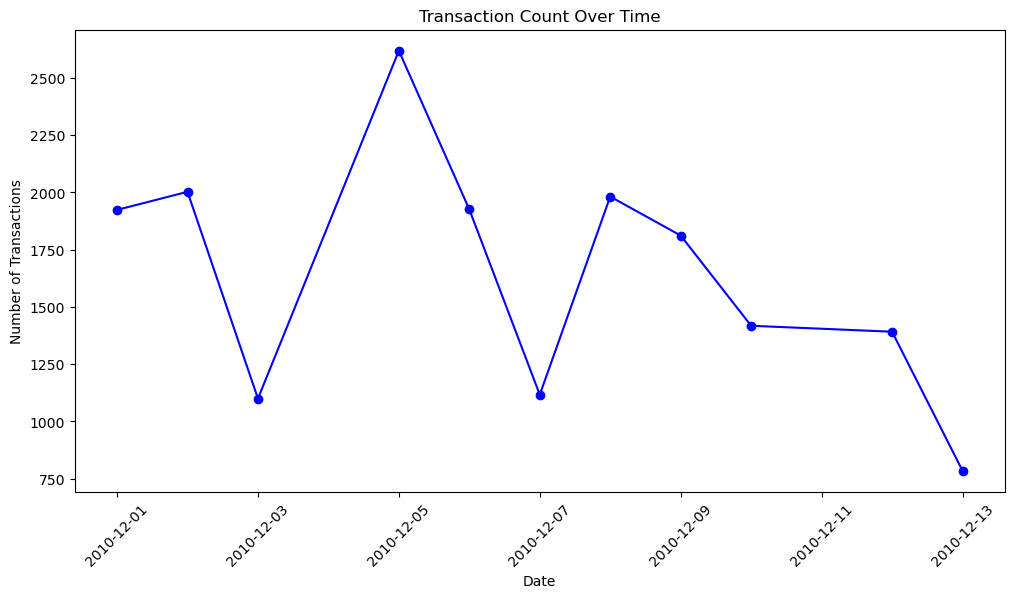

In [100]:
#  Transaction Count Over Time
transactions_over_time = Data_Visua.groupby(Data_Visua['InvoiceDate'].dt.date).size()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='line', color='b', marker='o')
plt.title('Transaction Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

plt.show()

Overall Trend: There is a visible fluctuation in total sales across different dates. This suggests varying customer purchasing patterns during the given period.

Peak Sales: Certain dates show notably higher sales. These peaks could correspond to specific events or promotions.

Low Sales Periods: There are also dates with relatively low sales, which could be due to various factors like weekdays vs. weekends, holidays, or other external factors


<h2 style='color:black'>Customer Analysis Insights </h2>

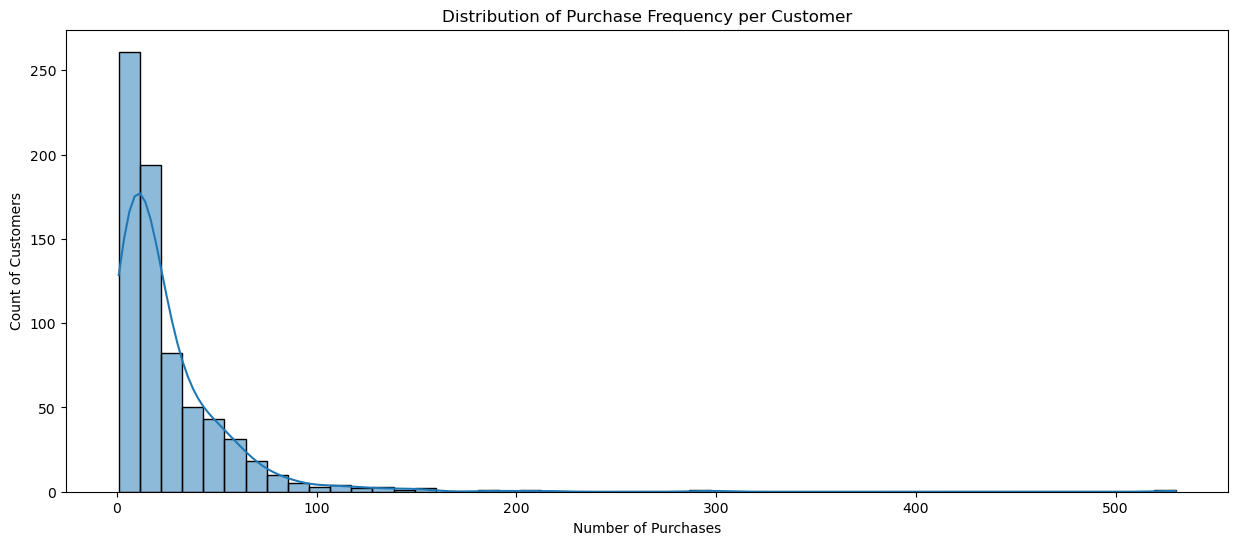

(713,
 count    713.000000
 mean      25.354839
 std       33.773519
 min        1.000000
 25%        7.000000
 50%       16.000000
 75%       32.000000
 max      530.000000
 Name: CustomerID, dtype: float64)

In [101]:
# Customer Analysis

# Counting the number of unique customers
unique_customers = Data_Visua['CustomerID'].nunique()

# Analyzing the frequency of purchases per customer
customer_frequency = Data_Visua['CustomerID'].value_counts()

# Setting up the figure for distribution of purchase frequency
plt.figure(figsize=(15, 6))
sns.histplot(customer_frequency, bins=50, kde=True)
plt.title('Distribution of Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Count of Customers')
plt.show()

unique_customers, customer_frequency.describe()


Unique Customers: The dataset contains transactions from 713 unique customers.

Purchase Frequency Distribution:

The histogram shows the distribution of the number of purchases per customer.
Most customers have a low to moderate number of transactions, as indicated by the high peak on the left side of the histogram.
There are a few customers with a very high number of transactions, suggesting the presence of repeat or loyal customers.
Statistical Summary:

The average number of purchases per customer is around 25.93.
However, there is a significant standard deviation of approximately 34.87, indicating a wide variation in the number of purchases among customers.
The maximum number of purchases by a single customer is 545, highlighting some highly active customers


<h2 style='color:black'>Product Analysis Insights </h2>

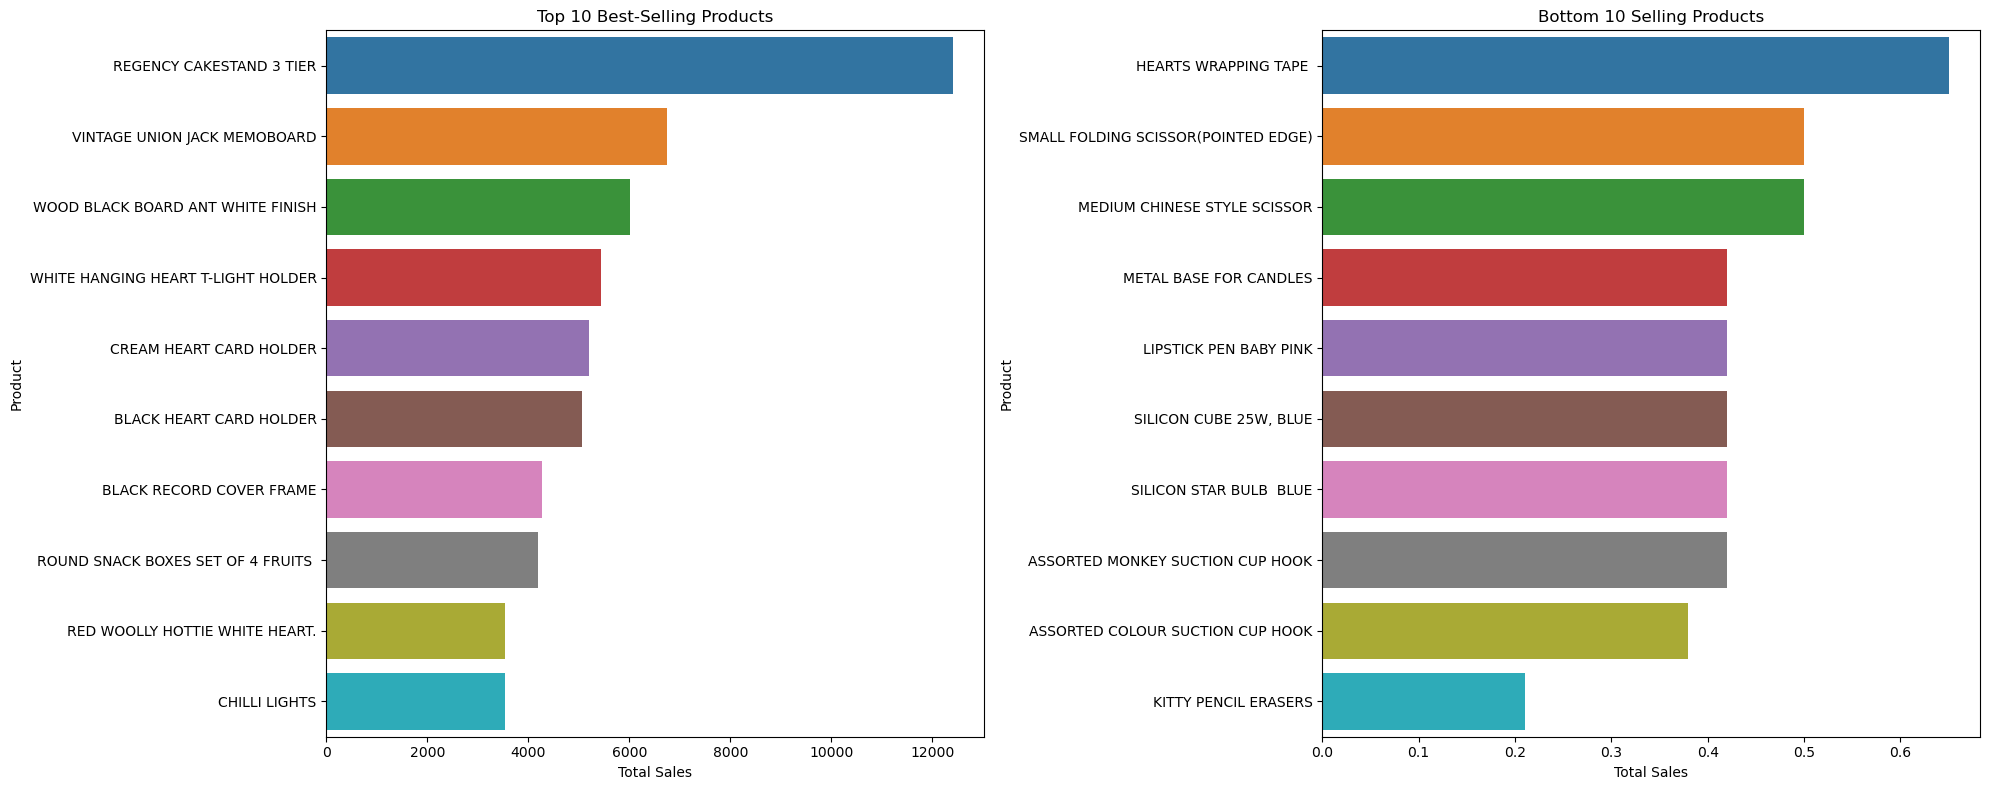

(Description
 REGENCY CAKESTAND 3 TIER              12406.95
 VINTAGE UNION JACK MEMOBOARD           6739.49
 WOOD BLACK BOARD ANT WHITE FINISH      6016.83
 WHITE HANGING HEART T-LIGHT HOLDER     5432.30
 CREAM HEART CARD HOLDER                5209.14
 BLACK HEART CARD HOLDER                5066.94
 BLACK RECORD COVER FRAME               4272.54
 ROUND SNACK BOXES SET OF 4 FRUITS      4196.30
 RED WOOLLY HOTTIE WHITE HEART.         3530.91
 CHILLI LIGHTS                          3527.64
 Name: TotalPrice, dtype: float64,
 Description
 HEARTS WRAPPING TAPE                   0.65
 SMALL FOLDING SCISSOR(POINTED EDGE)    0.50
 MEDIUM CHINESE STYLE SCISSOR           0.50
 METAL BASE FOR CANDLES                 0.42
 LIPSTICK PEN BABY PINK                 0.42
 SILICON CUBE 25W, BLUE                 0.42
 SILICON STAR BULB  BLUE                0.42
 ASSORTED MONKEY SUCTION CUP HOOK       0.42
 ASSORTED COLOUR SUCTION CUP HOOK       0.38
 KITTY PENCIL ERASERS                   0.21
 Name: To

In [102]:
# Product Analysis

# Calculating total sales for each product
product_sales = Data_Visua.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

# Top 10 best-selling products
top_10_products = product_sales.head(10)

# Bottom 10 products (excluding negative sales which might be returns)
bottom_10_products = product_sales[product_sales > 0].tail(10)

# Setting up the figures for top and bottom selling products
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_products.values, y=top_10_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')

plt.subplot(1, 2, 2)
sns.barplot(x=bottom_10_products.values, y=bottom_10_products.index)
plt.title('Bottom 10 Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')

plt.tight_layout()
plt.show()

top_10_products, bottom_10_products


 Top 10 Best-Selling Products
The top-selling products are led by items like "REGENCY CAKESTAND 3 TIER" and "VINTAGE UNION JACK MEMOBOARD", indicating a strong customer preference for these items.
Other top sellers include decorative and household items like "WHITE HANGING HEART T-LIGHT HOLDER" and "CREAM HEART CARD HOLDER".
The success of these products could be due to various factors such as popularity, seasonality, or promotions.
Bottom 10 Selling Products
The least selling products include items like "HEARTS WRAPPING TAPE", "SMALL FOLDING SCISSOR", and "LIPSTICK PEN BABY PINK".
These products show significantly lower sales figures compared to the top sellers.
The low sales could be due to less demand, niche appeal, or lack of visibility in the store


<h1 style='color:blue'>Step3: Data visualizations </h1>

In [103]:
Data_Visua =data_cleaned.copy()

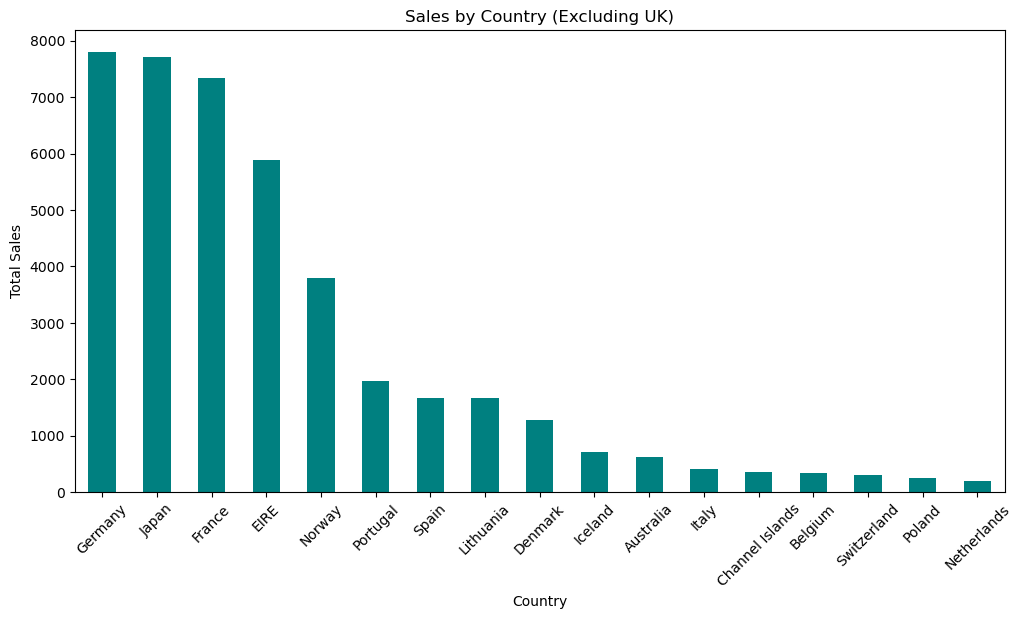

In [104]:
# Sales by Country (excluding UK for better scale visualization)
sales_by_country_excluding_uk = Data_Visua[Data_Visua['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_country_excluding_uk.plot(kind='bar', color='teal')
plt.title('Sales by Country (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

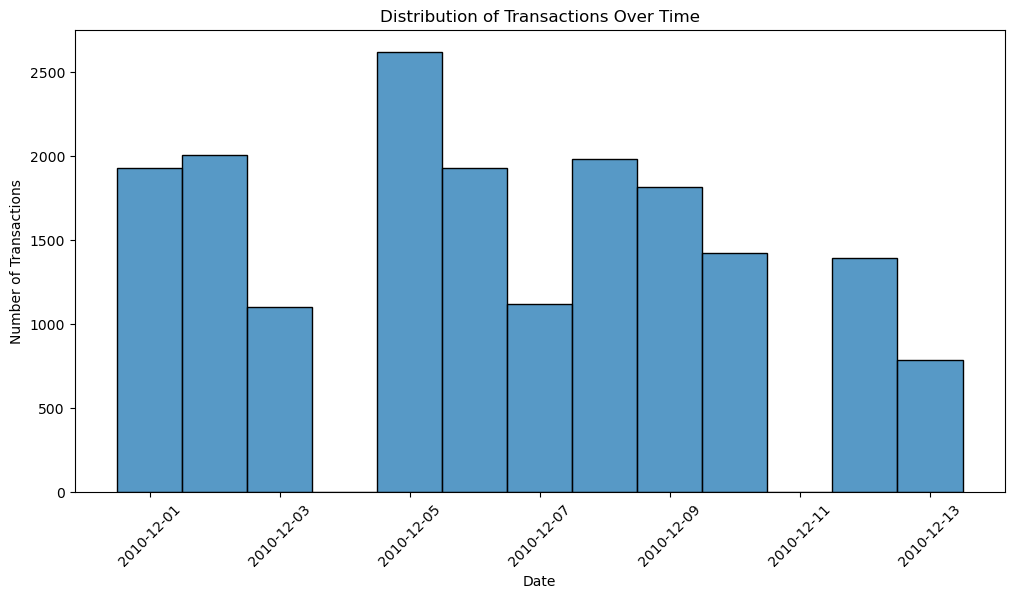

In [105]:
# Transactions over Time
plt.figure(figsize=(12, 6))
Data_Visua['InvoiceDate'] = pd.to_datetime(Data_Visua['InvoiceDate'])
sns.histplot(Data_Visua['InvoiceDate'].dt.date, bins=50, kde=False)
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

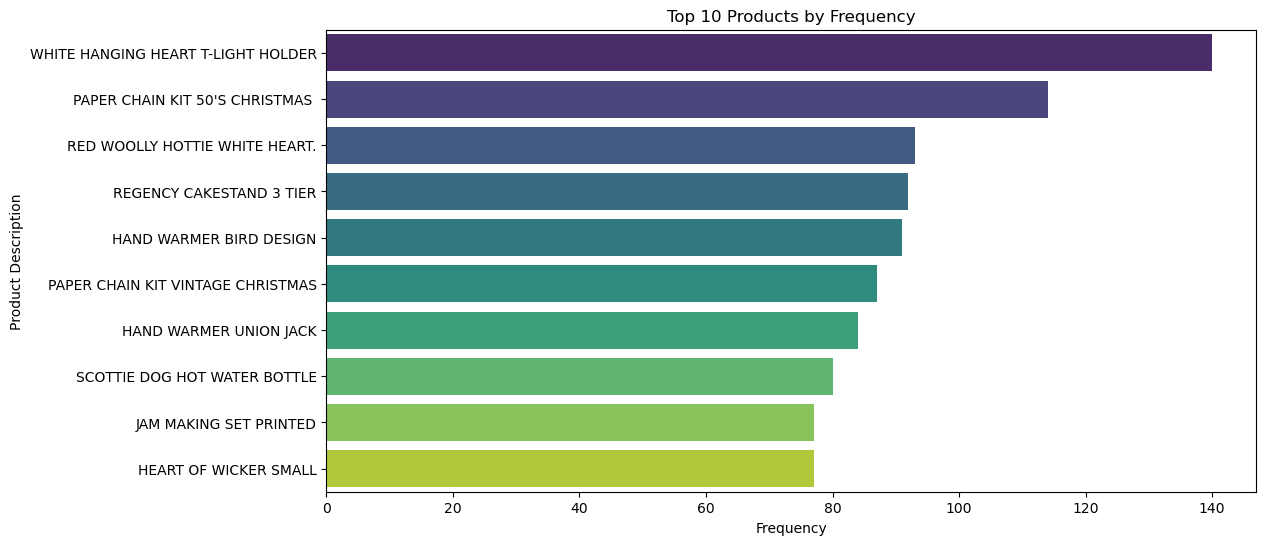

In [106]:
#  Product Variety
top_products = Data_Visua['Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_products.index, x=top_products, palette='viridis')
plt.title('Top 10 Products by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Product Description')

plt.show()

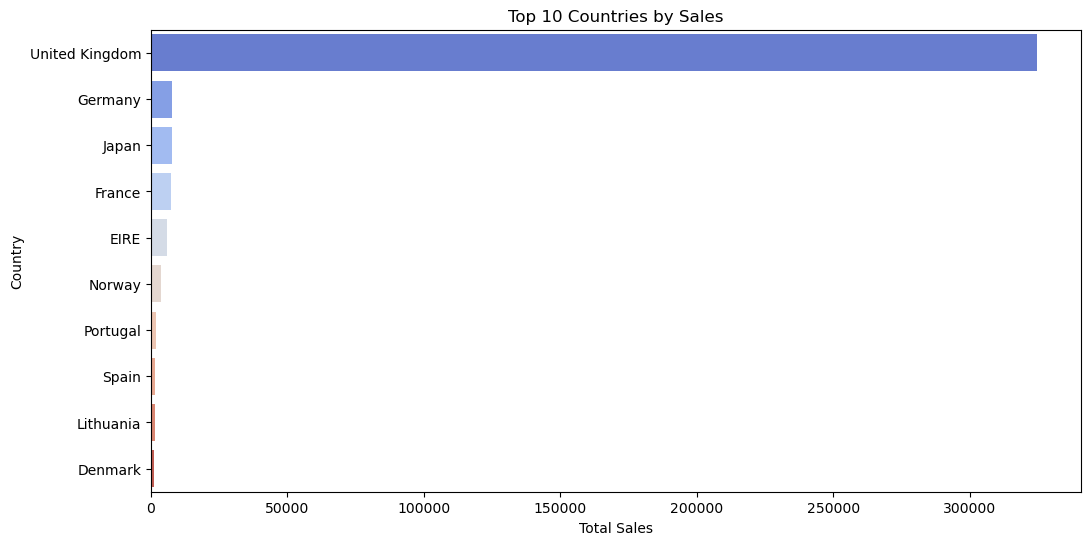

In [107]:
#Sales Distribution by Country
sales_by_country = Data_Visua.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country, y=sales_by_country.index, palette='coolwarm')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')

plt.show()


<h1 style='color:blue'>Step4: Linear regression model </h1>

In [116]:

df.columns
linear_reg =data_cleaned.copy()


In [117]:
# X = df[['age',  'gdp_country', 'life_expectancy_country', 'population_country']]
X = linear_reg[['Quantity',   "UnitPrice", ]]
y = linear_reg['TotalPrice']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75)

# Creating and fitting the linear regression model
ml = LinearRegression()
ml.fit(xtrain, ytrain)

# Printing the accuracy  on the test set
accuracy = ml.score(xtest, ytest)
print("Accuracy:", accuracy)

X_new = pd.DataFrame({'Quantity': [50, 71, 78],
                      'UnitPrice': [180000.0, 280000.0, 1880000.0]
                      })
                     

# Making predictions for the new data
predictions = ml.predict(X_new)

print("Predictions:", predictions)

Accuracy: 0.15738535174002688
Predictions: [ 181560.09854107  282416.60332724 1896013.76268281]
